In [73]:
import sys, os, time, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
dir_name = '/Users/gideonidumah/openmc_project/'
kernel_rf = 'RF/'
d_sizes = ['small', 'medium', 'large', 'XXL', 'XXL_modified']

obj_rf = {}
for s in d_sizes:
    rates = pd.read_csv(f'{dir_name}{kernel_rf}{s}_problem.csv')['objective']
    obj_rf[s] = rates * -1

# kernel_dummy = 'DUMMY/'
# obj_dummy = {}
# for s in d_sizes:
#     rates = pd.read_csv(f'{dir_name}{kernel_dummy}{s}_problem.csv')['objective']
#     obj_dummy[s] = rates * -1

In [79]:
gathered = []
cutoffs = []
iters = 0

d_sizes = ['small', 'medium', 'large', 'XXL', 'XXL_modified']
cutoffs = [3033.31, 78589.1, 343346.0, 440098.0, 440098.0]

for d_size in d_sizes:
    
    t = 0
    evals = []
    alpha = 0.1
    
    
    kernel_rf = 'RF/'
    file_rf = f'{dir_name}{kernel_rf}{d_size}_problem.csv'
    evals_rf = np.array(pd.read_csv(file_rf)['objective'])
    evals_rf *= -1
    n_rf = len(evals_rf)
    T_rf = np.array(pd.read_csv(file_rf)['elapsed_sec'])
    evals.extend(evals_rf)
    counter_rf = 0
    plot_rf = []
    best_rf = 0
    idx_rf = 0
    t_rf = T_rf[idx_rf] # picks the elapsed time
    
#     kernel_dummy = 'DUMMY/'
#     file_dummy = f'{dir_name}{kernel_dummy}{d_size}_problem.csv'
#     evals_dummy = np.array(pd.read_csv(file_dummy)['objective'])
#     evals_dummy *= -1
#     n_dummy = len(evals_dummy)
#     T_dummy = np.array(pd.read_csv(file_dummy)['elapsed_sec'])
#     evals.extend(evals_dummy)
#     counter_dummy = 0
#     plot_dummy = []
#     best_dummy = 0
#     idx_dummy = 0
#     t_dummy = T_dummy[idx_dummy] # picks the elapsed time
    
    T_max = int(max(T_rf.max(), T_dummy.max()))
    
#     cutoff = sorted(evals, reverse=True)[int(len(evals)*alpha)]#[0]
    cutoff = cutoffs[iters]
    print ('cutoff', cutoff)  
    
    while t < T_max:
        try:
            if t_rf < t and idx_rf <= n_rf-1:
                rf_tmp = float(evals_rf[idx_rf])
                if rf_tmp > cutoff:
                    counter_rf += 1
                plot_rf.append(counter_rf)
                idx_rf += 1
                if idx_rf <= n_rf-1:
                    t_rf = T_rf[idx_rf]
            elif idx_rf == n_rf or best_rf == 0:
                pass
            else:
                plot_rf.append(best_rf)
        except IndexError:
            pass
        
#         try:
#             if t_dummy < t and idx_dummy <= n_dummy-1:
#                 dummy_tmp = float(evals_dummy[idx_dummy])
#                 if dummy_tmp > cutoff:
#                     counter_dummy += 1
#                 plot_dummy.append(counter_dummy)
#                 idx_dummy += 1
                
#                 if idx_dummy <= n_dummy-1:
#                     t_dummy = T_dummy[idx_dummy]
                    
#             elif idx_dummy == n_dummy or best_dummy == 0:
#                 pass
#             else:
#                 plot_dummy.append(best_dummy)
#         except IndexError:
#             pass
        
        t += 1
    iters += 1
        
    cc = {}
    cc['rf'] = plot_rf
    cc['dummy'] = plot_dummy
    
    gathered.append(cc)
    cutoffs.append(cutoff)

cutoff 3033.31
cutoff 78589.1
cutoff 343346.0
cutoff 440098.0
cutoff 440098.0


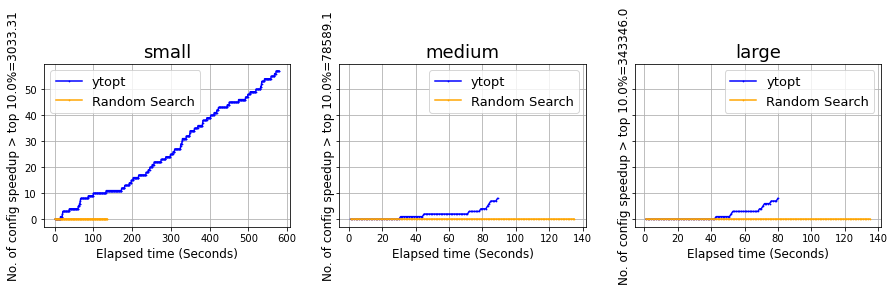

In [80]:
fig, axs = plt.subplots(1,3, figsize=(15, 3), sharex=False, sharey=True)
for ax, cc, d_size, cut in zip(axs.flat,gathered,d_sizes,cutoffs):
    dict_s = cc
    
    for k, v in dict_s.items():    
        if k == 'rf':
            k = 'ytopt'
            color = 'blue'
            
        if k == 'dummy':
            k = 'Random Search'
            color = 'orange'
    
        ax.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)
        
#     ax.plot(range(1, len(v) + 1), baseline*np.ones(len(v)), '-', label='Baseline', linewidth=1.5, markersize=1.5,color='red')
    ax.legend(fontsize=13)


#     ax.set_ylabel('Best speedup so far', fontsize=12)
    ax.set_xlabel('Elapsed time (Seconds)', fontsize=12)
    ax.set_title(d_size, fontsize=18)
    ax.set_ylabel('No. of config speedup > top '+str(alpha*100)+'%''='+str(cut), fontsize=12)
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=10)
    ax.grid()

In [81]:
cutoffs

[3033.31,
 78589.1,
 343346.0,
 440098.0,
 440098.0,
 3033.31,
 78589.1,
 343346.0,
 440098.0,
 440098.0]

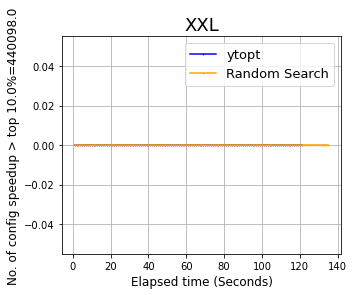

In [83]:
plt.figure(figsize=(5,4))

for k, v in gathered[-1].items():    
    if k == 'rf':
        k = 'ytopt'
        color = 'blue'
        
    if k == 'dummy':
        k = 'Random Search'
        color = 'orange'

    plt.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)

# plt.plot(range(1, len(v) + 1), baselines[-1]*np.ones(len(v)), '-', label='Baseline', linewidth=1.5, markersize=1.5,color='red')
plt.legend(fontsize=13)
plt.xlabel('Elapsed time (Seconds)', fontsize=12)
plt.ylabel('No. of config speedup > top '+str(alpha*100)+'%''='+str(cutoff), fontsize=12)
plt.title('XXL', fontsize=18)
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=10)
plt.grid()

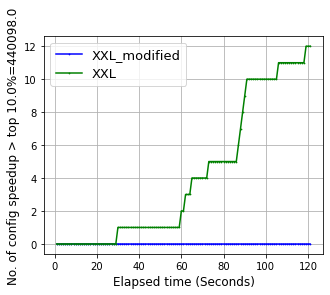

In [84]:
plt.figure(figsize=(5,4))

for i in [-1, -2]:
    for k, v in gathered[i].items():    
        if k == 'rf' and i == -1:
            k = 'XXL_modified'
            color = 'blue'
            plt.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)
        
        if k == 'rf' and i == -2:
            k = 'XXL'
            color = 'green'

            plt.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)

# plt.plot(range(1, len(v) + 1), baselines[-1]*np.ones(len(v)), '-', label='Baseline', linewidth=1.5, markersize=1.5,color='red')

    plt.xlabel('Elapsed time (Seconds)', fontsize=12)
    plt.ylabel('No. of config speedup > top '+str(alpha*100)+'%''='+str(cutoff), fontsize=12)
#     plt.title('XXL', fontsize=18)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
plt.grid()
plt.legend(fontsize=13)